In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [2]:
data = datasets.fetch_openml(
'mnist_784',
version=1,
return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

/home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


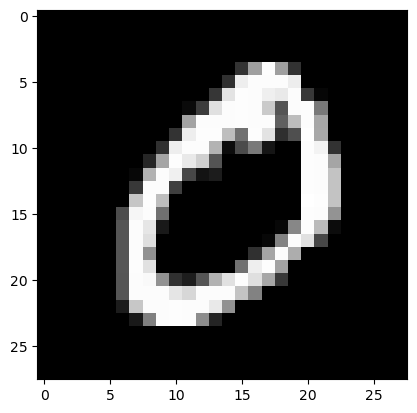

In [10]:
single_image = np.reshape(pixel_values.iloc[1, :].values,(28, 28))
plt.imshow(single_image, cmap='gray')

In [17]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values.iloc[:3000, :])

In [18]:
tsne_df = pd.DataFrame(
np.column_stack((transformed_data, targets.iloc[:3000].values)),
columns=["x", "y", "targets"]
)
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

/tmp/ipykernel_168558/1075787502.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)


In [22]:
tsne_df

,x,y,targets
0,20.515184,-11.026083,5
1,57.560905,0.121864,0
2,-0.679077,-54.268143,4
3,-41.528664,11.559952,1
4,-10.032307,-33.632420,9
...,...,...,...
2995,-35.470184,-24.492340,7
2996,52.467827,-3.201818,0
2997,-30.010117,-13.070750,9
2998,-29.661884,45.717960,1


/home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


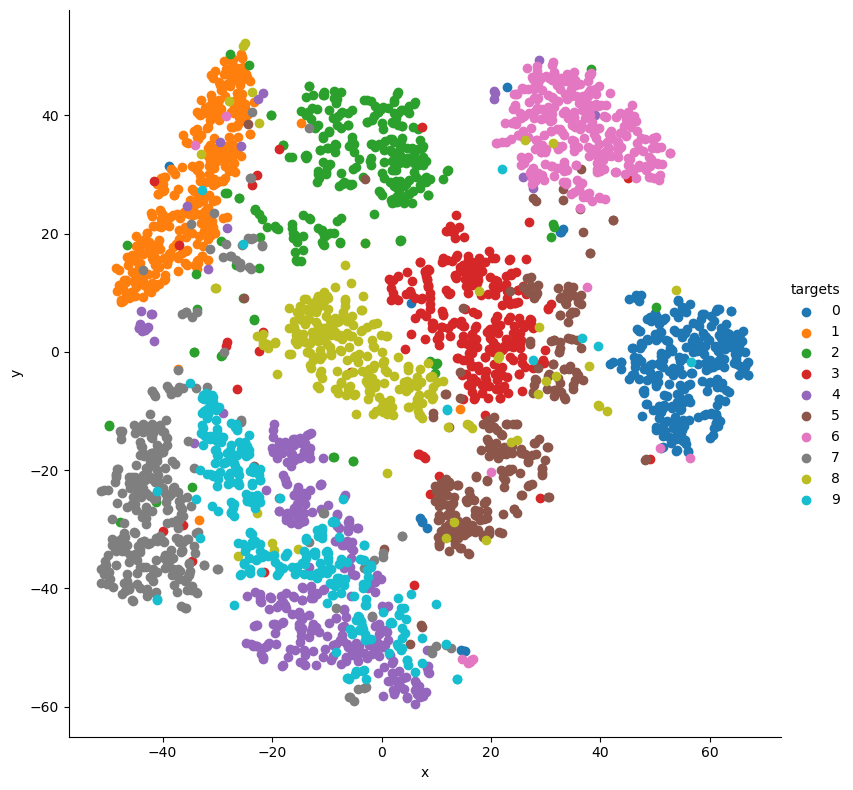

In [21]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
grid.map(plt.scatter, "x", "y").add_legend()

In [25]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
 
X_std = StandardScaler().fit_transform(pixel_values.iloc[:3000, :]) 
X_pca = PCA(n_components=2).fit_transform(X_std) 
X_pca = np.vstack((X_pca.T, targets.iloc[:3000].values)).T 
 
df_pca = pd.DataFrame(X_pca, columns=['x', 'y', 'targets']) 
df_pca.head()


,x,y,targets
0,-0.532740,-4.139968,5.0
1,9.376174,-6.028672,0.0
2,1.743523,9.761670,4.0
3,-7.191024,-3.778970,1.0
4,-5.214775,3.663597,9.0


/home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


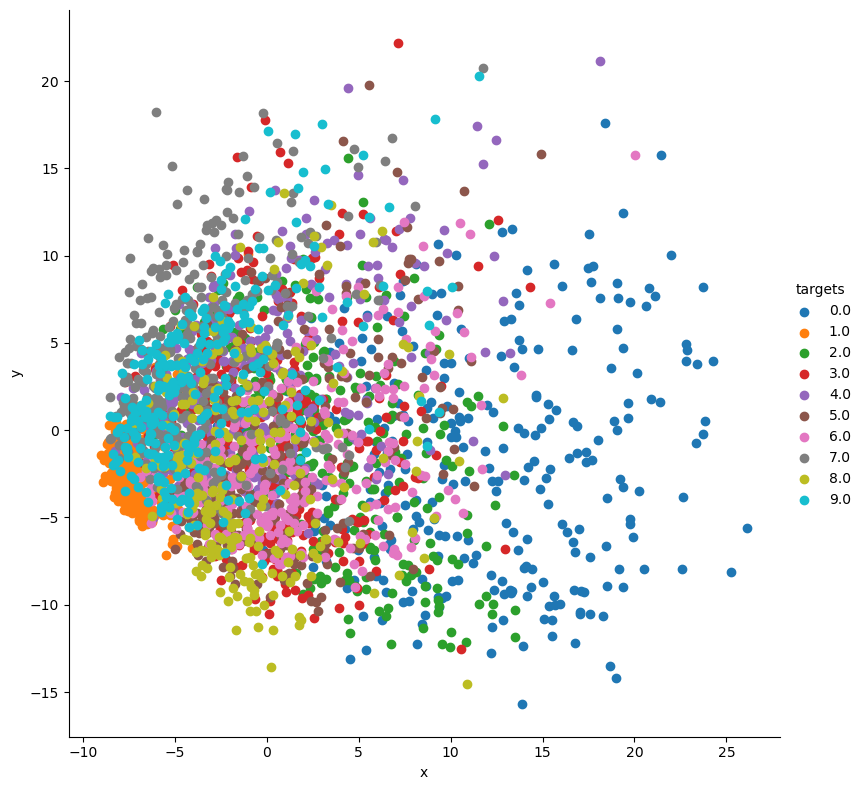

In [26]:
grid = sns.FacetGrid(df_pca, hue="targets", height=8)
grid.map(plt.scatter, "x", "y").add_legend()

## TSNE 降维
- t-SNE可视化效果更好，但是计算量大
- 用t分布的原因：相似度低的点，低维空间中t分布的距离大于正态分布，而对于相似度高的点，距离更近。所以在降维之后，同一集群中的点在一起更近，而不同集群中的点距离更远，结果更优。相比于正太分布，t 分布更扁，相同的相似度在坐标上会更分散，所以更清晰便于观察。
- > https://www.bilibili.com/video/BV1F5411P7JG/?spm_id_from=333.999.0.0&vd_source=77ad538e81a4cf20b61215dfcbc1e4fc
- > https://zhuanlan.zhihu.com/p/327699974

# Corss Validation


In [27]:
import pandas as pd
df = pd.read_csv("winequality-red.csv")

In [30]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [31]:
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5,
}
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [32]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,3
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,3
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


In [33]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)
# top 1000 rows are selected
# for training
df_train = df.head(1000)
# bottom 599 values are selected
# for testing/validation
df_test = df.tail(599)

In [37]:
# import from scikit-learn
from sklearn import tree
from sklearn import metrics
# initialize decision tree classifier class
# with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=7)
# choose the columns you want to train on
# these are the features for the model
cols = ['fixed acidity',
'volatile acidity',
'citric acid',
'residual sugar',
'chlorides',
'free sulfur dioxide',
'total sulfur dioxide',
'density',
'pH',
'sulphates',
'alcohol']
# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=7)

In [38]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])
# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])
# calculate the accuracy of predictions on
# training data set
train_accuracy = metrics.accuracy_score(
df_train.quality, train_predictions
)
# calculate the accuracy of predictions on
# test data set
test_accuracy = metrics.accuracy_score(
df_test.quality, test_predictions
)

In [39]:
train_accuracy, test_accuracy

(0.802, 0.5792988313856428)

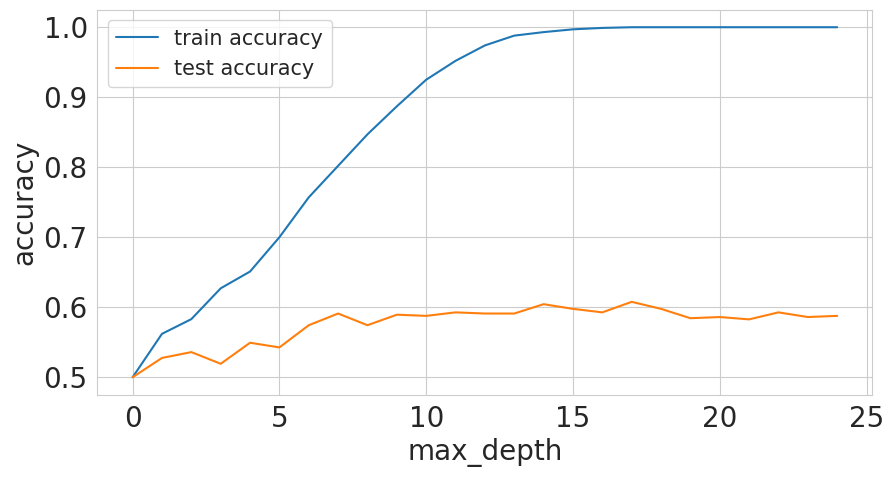

In [40]:
# import scikit-learn tree and metrics
from sklearn import tree
from sklearn import metrics
# import matplotlib and seaborn
# for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# this is our global size of label text
# on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
# This line ensures that the plot is displayed
# inside the notebook
%matplotlib inline
# initialize lists to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]
# iterate over a few depth values
for depth in range(1, 25):
    # init the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    # columns/features for training
    # note that, this can be done outside
    # the loop
    cols = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol'
    ]
    # fit the model on given features
    clf.fit(df_train[cols], df_train.quality)
    # create training & test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    # calculate training & test accuracies
    train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
    )
    test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
    )
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

# Overfitting
- 神经网络中，尤其是数据集很小，网络很大，会发生训练集和测试集很快到了最小loss，之后训练的loss可能继续减小，但是测试loss反而增加。
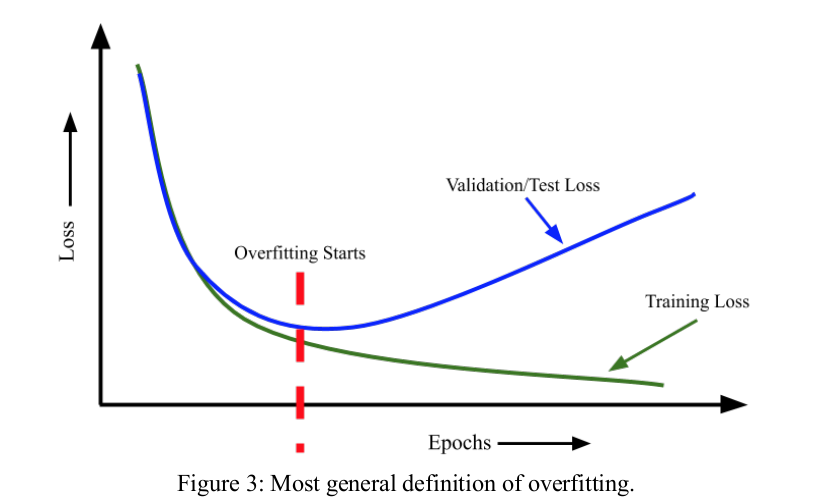

### k-fold Validation

In [42]:
from sklearn import model_selection
model_selection.KFold(n_splits=5)

KFold(n_splits=5, random_state=None, shuffle=False)

In [65]:
import pandas as pd
from sklearn import model_selection

df = pd.read_csv("winequality-red.csv")
df['kfold'] = -1
df = df.sample(frac=1).reset_index(drop=True)
kf = model_selection.KFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df)):
    df.loc[val_, 'kfold'] = fold
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,9.0,0.530,0.49,1.9,0.171,6.0,25.0,0.99750,3.27,0.61,9.4,6,0
1,9.2,0.580,0.20,3.0,0.081,15.0,115.0,0.99800,3.23,0.59,9.5,5,0
2,12.0,0.280,0.49,1.9,0.074,10.0,21.0,0.99760,2.98,0.66,9.9,7,0
3,7.2,0.410,0.30,2.1,0.083,35.0,72.0,0.99700,3.44,0.52,9.4,5,0
4,7.0,0.975,0.04,2.0,0.087,12.0,67.0,0.99565,3.35,0.60,9.4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.5,0.580,0.00,2.2,0.096,3.0,13.0,0.99557,3.62,0.62,11.5,4,4
1595,8.0,0.580,0.16,2.0,0.120,3.0,7.0,0.99454,3.22,0.58,11.2,6,4
1596,7.0,0.500,0.25,2.0,0.070,3.0,22.0,0.99630,3.25,0.63,9.2,5,4
1597,9.3,0.400,0.49,2.5,0.085,38.0,142.0,0.99780,3.22,0.55,9.4,5,4


Text(0, 0.5, 'count')

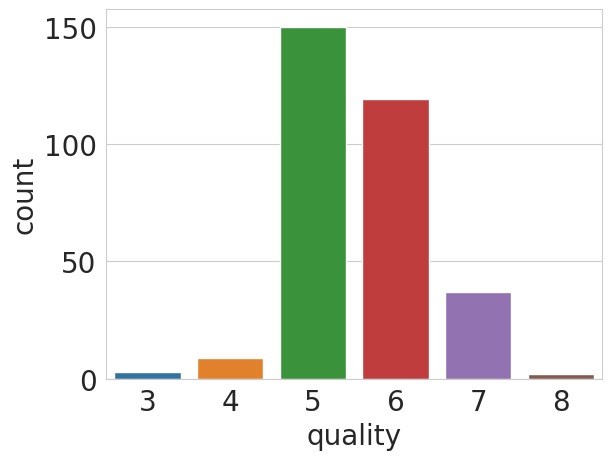

In [66]:
b = sns.countplot(x='quality', data=df.loc[df['kfold'] == 0])
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

Text(0, 0.5, 'count')

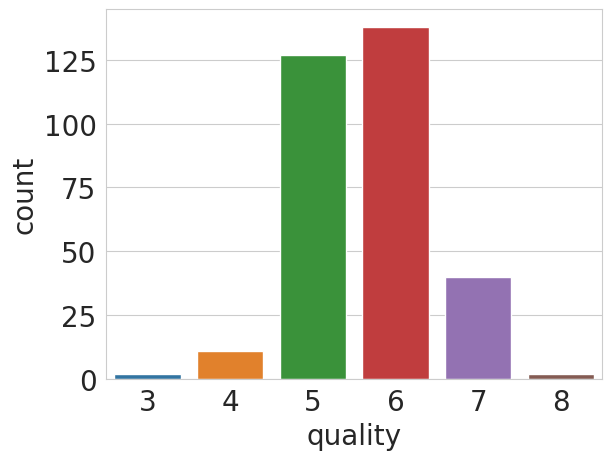

In [67]:
b = sns.countplot(x='quality', data=df.loc[df['kfold'] == 1])
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

### stratified k-fold Validation
- 当90%正例10%负例直接用k-fold，可能导致所有负例到同一fold里面
- 要在每一折中保持这个比例，则用stratified k-fold
- The rule is simple. If it’s a standard classification problem, choose stratified k-fold
blindly.

In [46]:
df = pd.read_csv("winequality-red.csv")
df['kfold'] = -1
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,-1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,-1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,-1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,-1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,-1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,-1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,-1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,-1


In [52]:
import pandas as pd
from sklearn import model_selection

df = pd.read_csv("winequality-red.csv")
df['kfold'] = -1
df = df.sample(frac=1).reset_index(drop=True)
kf = model_selection.StratifiedKFold(n_splits=5)
y = df.quality.values
for fold, (trn_, val_) in enumerate(kf.split(X=df, y=y)):
    df.loc[val_, 'kfold'] = fold

In [60]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,8.2,0.200,0.43,2.5,0.076,31.0,51.0,0.99672,3.53,0.81,10.4,6,0
1,8.8,0.550,0.04,2.2,0.119,14.0,56.0,0.99620,3.21,0.60,10.9,6,0
2,7.5,0.755,0.00,1.9,0.084,6.0,12.0,0.99672,3.34,0.49,9.7,4,0
3,7.9,0.350,0.21,1.9,0.073,46.0,102.0,0.99640,3.27,0.58,9.5,5,0
4,7.0,0.655,0.16,2.1,0.074,8.0,25.0,0.99606,3.37,0.55,9.7,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,9.2,0.590,0.24,3.3,0.101,20.0,47.0,0.99880,3.26,0.67,9.6,5,4
1595,11.2,0.660,0.24,2.5,0.085,16.0,53.0,0.99930,3.06,0.72,11.0,6,4
1596,9.8,0.500,0.34,2.3,0.094,10.0,45.0,0.99864,3.24,0.60,9.7,7,4
1597,6.9,0.500,0.04,1.5,0.085,19.0,49.0,0.99580,3.35,0.78,9.5,5,4


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
290,8.6,0.635,0.68,1.8,0.403,19.0,56.0,0.99632,3.02,1.15,9.3,5,1
294,7.0,0.400,0.32,3.6,0.061,9.0,29.0,0.99416,3.28,0.49,11.3,7,1
295,8.8,0.400,0.40,2.2,0.079,19.0,52.0,0.99800,3.44,0.64,9.2,5,1
296,7.2,0.410,0.30,2.1,0.083,35.0,72.0,0.99700,3.44,0.52,9.4,5,1
297,7.5,0.580,0.03,4.1,0.080,27.0,46.0,0.99592,3.02,0.47,9.2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,8.4,0.670,0.19,2.2,0.093,11.0,75.0,0.99736,3.20,0.59,9.2,4,1
693,10.2,0.230,0.37,2.2,0.057,14.0,36.0,0.99614,3.23,0.49,9.3,4,1
694,6.7,1.040,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0,4,1
766,10.0,0.260,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8,1


Text(0, 0.5, 'count')

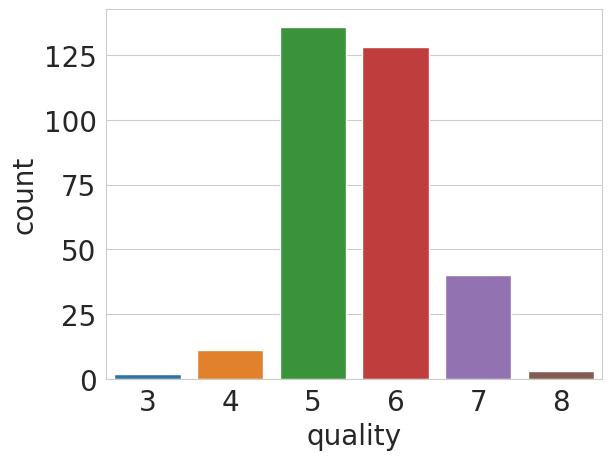

In [63]:
b = sns.countplot(x='quality', data=df.loc[df['kfold'] == 0])
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

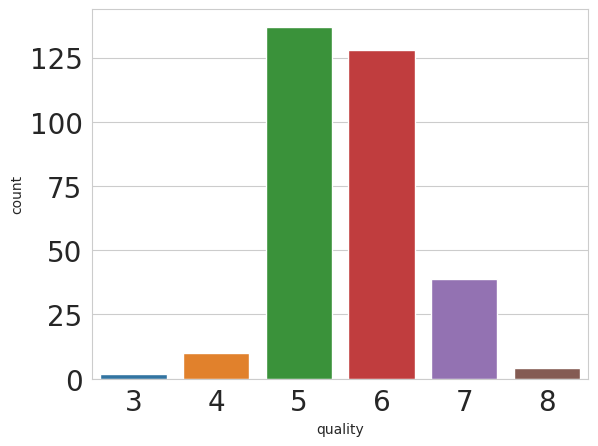

In [64]:
b = sns.countplot(x='quality', data=df.loc[df['kfold'] == 1])

### hold-out based validation
？

自助法（Bootstrap）部分场景下，数据量较少，很难通过已有的数据来估计数据的整体分布（因为数据量不足时，计算的统计量反映不了数据分布），这时可以使用 Bootstrap 自助法。Bootstrap 是一种用小样本估计总体值的一种非参数方法，在进化和生态学研究中应用十分广泛。Bootstrap通过有放回抽样生成大量的伪样本，通过对伪样本进行计算，获得统计量的分布，从而估计数据的整体分布。有了有效的模型评估方法，我们还需要量化的度量标准来精准评估与判断。下文归纳了分类与回归问题的各类评估指标。

作者：颜玄墨
链接：https://zhuanlan.zhihu.com/p/554539874
来源：知乎
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

作者：热血老男孩
链接：https://zhuanlan.zhihu.com/p/564057495
来源：知乎
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

1.留出法 留出法（hold-out）直接将数据集D分为两个互斥的集合，其中一个集合做为训练集S，另一个做为测试集T，在S上训练完成后用T来评估其测试误差，做为对泛化误差的估计。常见的做法是将大约2/3~4/5的样本用于训练，剩余样本用于测试

2.交叉验证法 交叉验证法（cross validation）先将数据集D划分为K个大小相似的互斥子集，每个子集都是通过分层采样得到，以尽可能保持数据分布的一致性；然后每次用k-1个子集做训练集，余下的子集做测试集，这样一共可以得到k组训练集/测试集，从而可以进行k次训练和测试，最终返回k次训练的均值。 通常把交叉验证又叫做k折交叉验证，如k取10，则是10折交叉验证； 留一法（leave-One-Out）：特殊的，当数据集D中有m个样本，令k=m，即每个子集只有一个样本，也即每次只留出一个做为测试集，这样的方法叫做留一法。

3.自助法 引言：我们希望评估的是在数据集D上训练出的模型，但是留出法和交叉验证法都保留了一部分样本用于测试，数据集规模要小于原来的规模，因此会引入一些因训练样本规模不同而导致的估计偏差，留一法受训练样本规模影响较小，但是计算复杂度太高了（训练集很小时还行）。自助法（bootstrapping），对于一个拥有m个样本的数据集D，有放回的进行采样m次，就得到了一个同等规模的D*，显然D*中有的样本会出现多次，有的样本一次都不会出现，可以简单估计，样本在m次采样中始终不被采到的概率是 （1-1/m）^m，取极限得到=1/e =0.368；即 通过自助法大约有1/3的数据被用来做测试集 实际评估的模型与期望评估的模型都是用m个训练样本，而我们仍有1/3的没在训练集出现的数据用于测试，这样的测试结果也称作包外估计（out-of-bagestimate）。优缺点优点：自助法在数据集较小，难以有效划分训练集测试集时很有用；此外自助法能从初始数据集中产生多个不同的训练集，这对集成学习等方法很有用处。缺点：自助法产生的数据集改变了原来数据集的样本分布，这会引入估计偏差，因此，在初始数据量足够时，留出法和交叉验证法更常用一些。

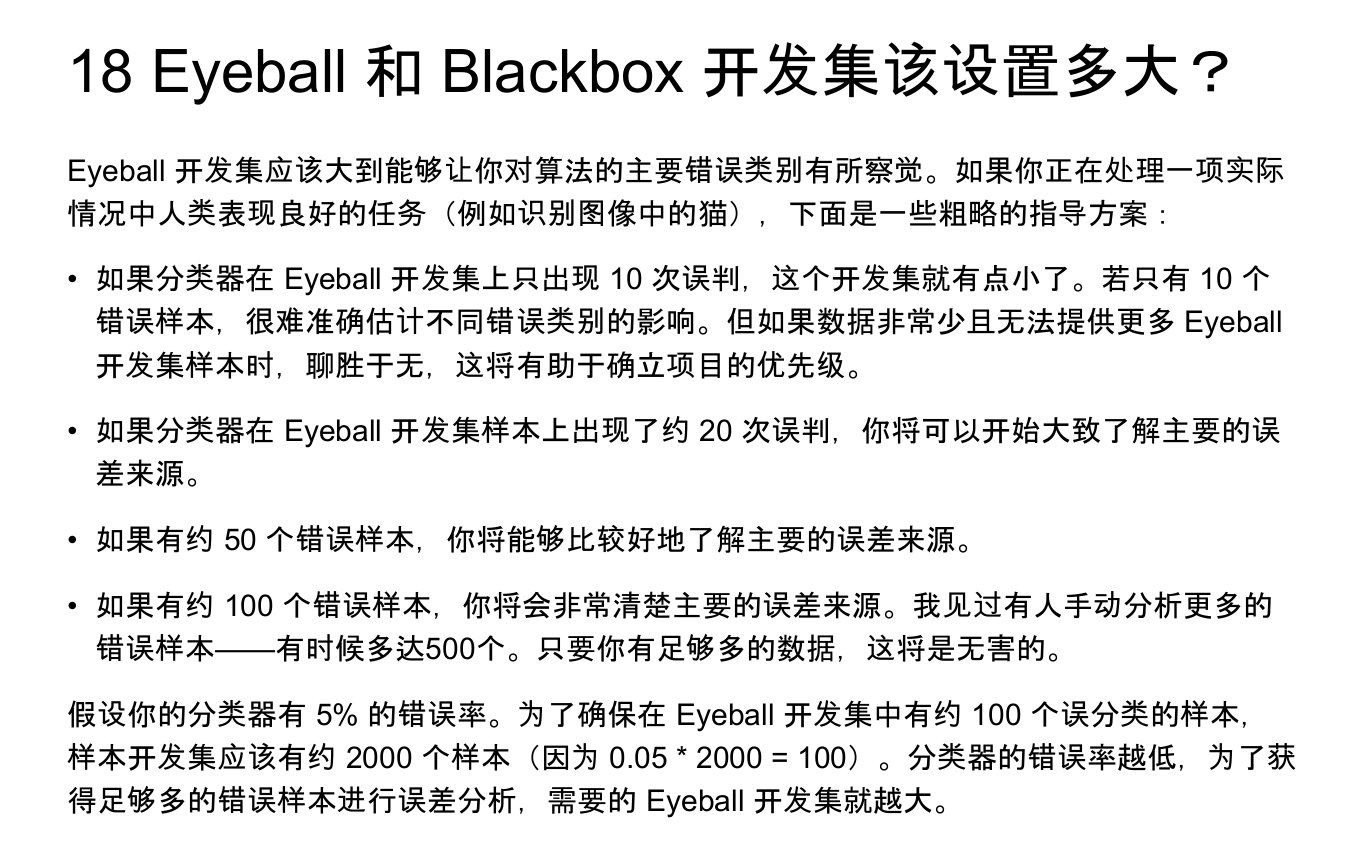

### GroupKFold.
- 比如有通过患者的皮肤图片判断是否是皮肤癌的问题，同一个患者可能有多个图片，因此，同一个患者的图片只能出现在测试集或者只能在训练集。因此引入了groupKFold

### Evaluation metrics
- 准确率： 预测的准确值/总值 问题：当数据是skewed data时，比如positive:negetive = 9:1, 只要预测全部对，就能得到90%的准确率。因此准确率只适合均匀分布的数据
- TP/TN FP/FN, 预测的对不对是true or false, 类的划分是预测的是positive or negative. 正例预测对了是TP, 预测的是负例且对了是TN
- Precision 预测为正例的结果中，为预测为正例中正确的有多少 TP/TP+FP
- Recall 实际上所有的正例中，预测对了的有多少， TP/TP+FN , FN就是实际上是正例，但预测错了。因此为FN.

In [69]:
def accuracy(y_true, y_pred):
    acc_count = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            acc_count += 1
    return acc_count/len(y_true)

In [70]:
from sklearn import metrics
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
metrics.accuracy_score(l1, l2)
# accuracy(l1, l2)

0.625

In [82]:
def true_positive(y_true, y_pred):
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == yp and yp == 1:
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == yp and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt != yp and yp == 1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt != yp and yp == 0:
            fn += 1
    return fn

In [83]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
true_positive(l1, l2), false_positive(l1, l2), false_negative(l1, l2), true_negative(l1, l2)

(2, 1, 2, 3)

In [ ]:
def accuracy_v2(y_true, y_pred):
    """
    Function to calculate accuracy using tp/tn/fp/fn
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    accuracy_score = (tp + tn) / (tp + tn + fp + fn)
    return accuracy_score

Let’s say we make a new model on the new skewed dataset and our model correctly
identified 80 non-pneumothorax out of 90 and 8 pneumothorax out of 10. Thus, we
identify 88 images out of 100 successfully. The accuracy is, therefore, 0.88 or 88%.

Thus, we have:
TP : 8
TN: 80
FP: 10
FN: 2
So, our precision is 8 / (8 + 10) = 0.444.

In [84]:
def precision(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    return tp/(tp+fp)

def recall(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    return tp/(tp+fn)

recall(l1, l2), precision(l1, l2)

(0.5, 0.6666666666666666)